In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Problem 1

In [2]:
def newton(f, Df, x0, epsilon, max_iter, h=None):
    '''Approximate solution of f(x)=0 by Newton's method.
    
    Parameters
    -----------
    f : function
        Function for which we are searching for a solutoin f(x)=0.
    Df : function
        Derivative of f(x).
    x0 : number
        Initial guess for a solution f(x)=0.
    epsilon : number 
        Stopping criteria is abs(f(x)) < epsilon. 
    max_iter : integer
        Maximum number of iterations of Newton's method.
    h : stepsize
    Returns
    -------------
    xn : number
        Implement Newton's method: compute the linear approximation
        of f(x) at xn and find x intercept by the formula
            x = xn -f(xn)/Df(xn)
        Continue until abs(f(xn)) < epsilon and return xn.
        If Df(xn) == 0, return None. If the number of iterations
        exceeds max_iter, then return None.
    ---------
    '''
    xn = x0
    if h is None:
        for n in range(0, max_iter):
            fxn = f(xn)
            if abs(fxn) < epsilon:
                # print("Found solution after", n, "iterations.")
                return xn
            Dfxn = Df(xn)
            if Dfxn == 0:
                # print("Zero derivative. No solution found.")
                return None
            
            xn -= fxn/Dfxn
        # print("Exceed maximum iterations. No solution found.")
        return None

    else:
        h = h
        for n in range(0, max_iter):
            fxn = f(xn, h)
            if abs(fxn) < epsilon:
                # print("Found solution after", n, "iterations.")
                return xn
            Dfxn = Df(xn, h)
            if Dfxn == 0:
                # print("Zero derivative. No solution found.")
                return None
            
            xn -= fxn/Dfxn
        # print("Exceed maximum iterations. No solution found.")
        return None



1a) Implement the Trapezoid method and then compare the results from the Forward Euler, Backward Euler, and Trapezoid Method for the test problem
$$
\frac{dy}{dt} = \lambda y, ~ y(0) = 1, ~ 0\leq t \leq 1.
$$
Develop test cases for $\lambda < 0$ and $\lambda >0$.  Using the exact solution described above, determine the order of error of each method.  Describe the behavior of the solutions and their accuracy as you vary $\delta t$ in the different methods.  Note, for this problem, we see that we do not need a root finder for the implicit schemes since 

Backward Euler: $y_{n+1} = y_{n}+\delta t \lambda y_{n+1}$ so $y_{n+1} = \frac{y_{n}}{1-\lambda \delta t} = \left(\frac{1}{1-\lambda \delta t} \right)^{n+1}y_{0}$

Trapezoid: $y_{n+1} = y_{n}+\frac{\lambda\delta t}{2} \left(y_{n+1}+y_{n}\right)$ so $y_{n+1} = \frac{1+\lambda \delta t/2}{1-\lambda \delta t/2}y_{n} = \left(\frac{1+\lambda \delta t/2}{1-\lambda \delta t/2} \right)^{n+1}y_{0}$.

In [3]:
t0 = 0.
tf = 1.
y0 = 1.
lamb = -10

dt = 0.2
myf = lambda t,y: y0*np.exp(lamb*t)
de = lambda t, y: lamb*y
exact = lambda t,lamb : np.exp(lamb * t)

In [4]:
def forward_euler1(f,dt,t0,tf,y0, lamb=None):
    nsteps = int(np.round((tf-t0)/dt))
    ysol = np.zeros(nsteps+1)
    times = np.zeros(nsteps+1)
    ysol[0] = y0
    times[0] = t0
    for jj in range(1,nsteps+1):
        ysol[jj] = ysol[jj-1] + dt*f(times[jj-1],ysol[jj-1])
        times[jj] = times[jj-1] + dt
    return np.array([times,ysol])

def backward_euler1(f,dt,t0,tf,y0, lamb):
    nsteps = int(np.round((tf-t0)/dt))
    ysol = np.zeros(nsteps+1)
    times = np.zeros(nsteps+1)
    ysol[0] = y0
    times[0] = t0
    for jj in range(1,nsteps+1):
        times[jj] = times[jj-1] + dt
        ysol[jj] = y0 * (1/(1-lamb*dt))**(jj) 
    return np.array([times,ysol])


def trapezoid_method1(f, dt, t0, tf, y0, lamb):
    nsteps = int(np.round((tf-t0)/dt))
    ysol = np.zeros(nsteps+1)
    times = np.zeros(nsteps+1)
    ysol[0] = y0
    times[0] = t0
    for jj in range(1,nsteps+1):
        times[jj] = times[jj-1] + dt
        ysol[jj] = y0 * ((1+lamb*dt/2)/(1-lamb*dt/2))**(jj)
    return np.array([times,ysol])


In [5]:
forward = forward_euler1(de, dt, t0, tf, y0)
grid = forward[0]
backward = backward_euler1(de, dt, t0, tf, y0, lamb=lamb)
trapezoid = trapezoid_method1(de, dt, t0, tf, y0, lamb=lamb)

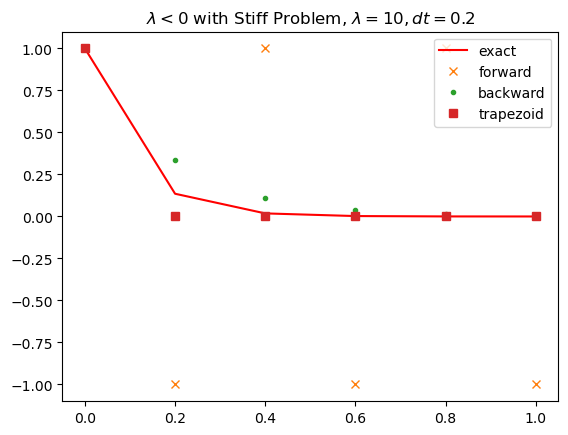

In [6]:
plt.plot(grid, myf(grid, _), "r", label="exact")
plt.plot(grid, forward[1], "C1x", label = "forward")
plt.plot(grid, backward[1], "C2.", label = "backward")
plt.plot(grid, trapezoid[1], "C3s", label = "trapezoid")
plt.title("$\lambda < 0$ with Stiff Problem, $\lambda = 10, dt = 0.2$")
plt.savefig("stiff problem.png")
plt.legend()
plt.show()

In [7]:
t0 = 0.
tf = 1.
y0 = 1.
lamb = -10

dt = 0.05
myf = lambda t,y: y0*np.exp(lamb*t)
de = lambda t, y: lamb*y

In [8]:
forward = forward_euler1(de, dt, t0, tf, y0)
grid = forward[0]
backward = backward_euler1(de, dt, t0, tf, y0, lamb=lamb)
trapezoid = trapezoid_method1(de, dt, t0, tf, y0, lamb=lamb)

In [9]:
forward

array([[0.00000000e+00, 5.00000000e-02, 1.00000000e-01, 1.50000000e-01,
        2.00000000e-01, 2.50000000e-01, 3.00000000e-01, 3.50000000e-01,
        4.00000000e-01, 4.50000000e-01, 5.00000000e-01, 5.50000000e-01,
        6.00000000e-01, 6.50000000e-01, 7.00000000e-01, 7.50000000e-01,
        8.00000000e-01, 8.50000000e-01, 9.00000000e-01, 9.50000000e-01,
        1.00000000e+00],
       [1.00000000e+00, 5.00000000e-01, 2.50000000e-01, 1.25000000e-01,
        6.25000000e-02, 3.12500000e-02, 1.56250000e-02, 7.81250000e-03,
        3.90625000e-03, 1.95312500e-03, 9.76562500e-04, 4.88281250e-04,
        2.44140625e-04, 1.22070312e-04, 6.10351562e-05, 3.05175781e-05,
        1.52587891e-05, 7.62939453e-06, 3.81469727e-06, 1.90734863e-06,
        9.53674316e-07]])

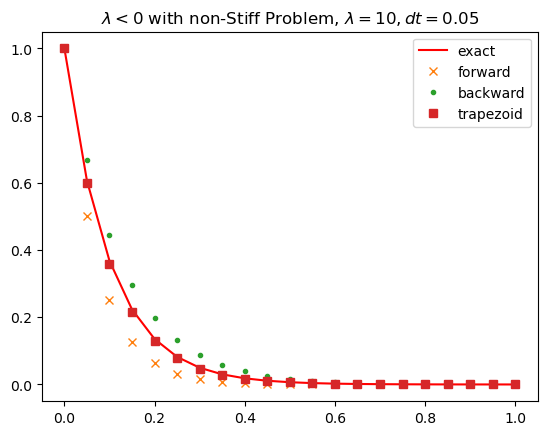

In [10]:
plt.plot(grid, myf(grid, _), "r", label="exact")
plt.plot(grid, forward[1], "C1x", label = "forward")
plt.plot(grid, backward[1], "C2.", label = "backward")
plt.plot(grid, trapezoid[1], "C3s", label = "trapezoid")
plt.title("$\lambda < 0$ with non-Stiff Problem, $\lambda = 10, dt = 0.05$")
plt.legend()
plt.savefig("non-stiff problem.png")
plt.show()

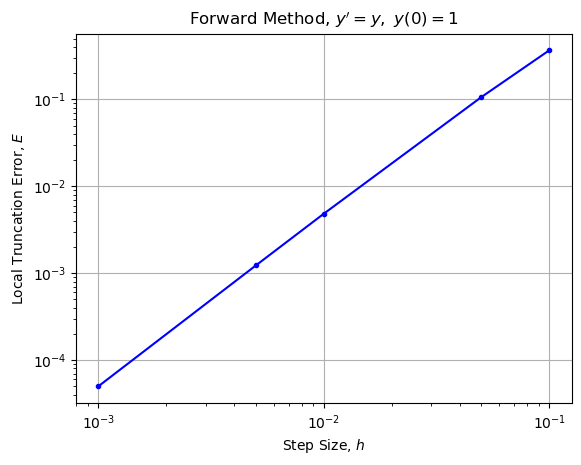

1.7879643535975378
1.9211997491263726
1.9762540754208622
1.991756861119846


In [11]:
# f = lambda t,y: y
# y0 = 1;
h = [0.1,0.05,0.01,0.005,0.001]
E = np.zeros(len(h))

for i,n in enumerate(h):
    # print(i)|
    forward = forward_euler1(de, n, t0, tf, y0, lamb)

    # y = odeEuler(f,[0,h[n]],y0)
    y = forward[1][1]
    y1_exact = exact(n, lamb)
    E[i] = np.abs(y1_exact - y)
    
plt.loglog(h,E,'b.-'), plt.grid(True)
plt.title("Forward Method, $y'=y,~y(0)=1$")
plt.xlabel("Step Size, $h$"), plt.ylabel("Local Truncation Error, $E$")
plt.show()

for j in range(len(h)-1):
    print((np.log(E[j+1]) - np.log(E[j])) / (np.log(h[j+1]) - np.log(h[j])))

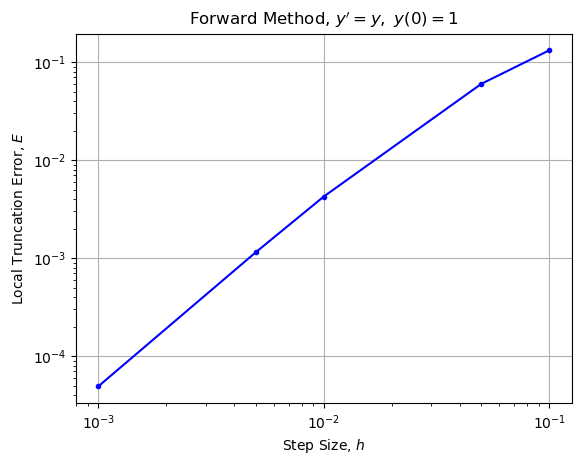

1.1355539960051313
1.6458346660057037
1.8850980787372995
1.9593400402655232


In [12]:
for i,n in enumerate(h):
    # print(i)|
    forward = backward_euler1(de, n, t0, tf, y0, lamb)

    # y = odeEuler(f,[0,h[n]],y0)
    y = forward[1][1]
    y1_exact = exact(n, lamb)
    E[i] = np.abs(y1_exact - y)
    
plt.loglog(h,E,'b.-'), plt.grid(True)
plt.title("Forward Method, $y'=y,~y(0)=1$")
plt.xlabel("Step Size, $h$"), plt.ylabel("Local Truncation Error, $E$")
plt.show()

for j in range(len(h)-1):
    print((np.log(E[j+1]) - np.log(E[j])) / (np.log(h[j+1]) - np.log(h[j])))

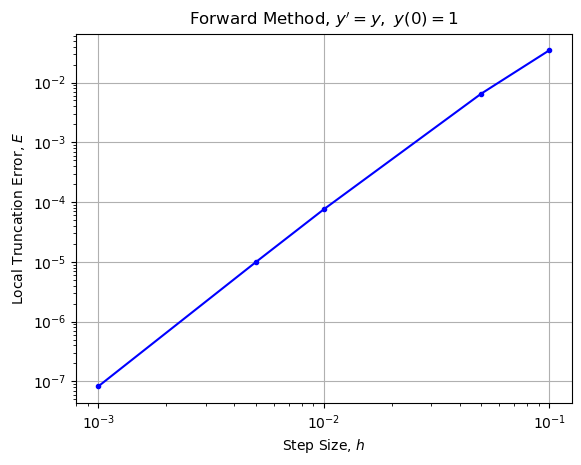

2.403222535431803
2.771125716986005
2.9294376990718987
2.9753671319465003


In [13]:
for i,n in enumerate(h):
    # print(i)|
    forward = trapezoid_method1(de, n, t0, tf, y0, lamb)

    # y = odeEuler(f,[0,h[n]],y0)
    y = forward[1][1]
    y1_exact = exact(n, lamb)
    E[i] = np.abs(y1_exact - y)
    
plt.loglog(h,E,'b.-'), plt.grid(True)
plt.title("Forward Method, $y'=y,~y(0)=1$")
plt.xlabel("Step Size, $h$"), plt.ylabel("Local Truncation Error, $E$")
plt.show()

for j in range(len(h)-1):
    print((np.log(E[j+1]) - np.log(E[j])) / (np.log(h[j+1]) - np.log(h[j])))

**Problem 1**: 10pts
1b) For the differential equation 
$$
\frac{dy}{dt} = \cos(y), ~ y(0) = 10, ~ 0\leq t \leq 10,
$$
find an exact solution using the fact that the problem is seperable. Then solve it using the Trapezoid Method.  Again, determine the order of error of the method and comment on how the numerical solution changes with step size $\delta t$. 


In [14]:
def backward_euler3(f, t0, tN, y0, h, df):
    '''
    f = numerical problem
    g = exact solution
    t0 = left
    tN = right
    y0 = initial condition
    h = step size
    '''
    N = int((tN - t0)/h)
    grid = np.linspace(t0, tN, N+1)
    ygrid = np.zeros_like(grid)
    ygrid[0] = y0
    iter = np.arange(0, N+1)
    for i in range(0, iter.size-1):
        u = lambda x : x - h*f(x, grid[i+1]) - ygrid[i]
        up = lambda x: 1 - h*df(x, grid[i+1])
        y_n1 = newton(u, up, ygrid[i]+1e3, 1e-9, 1000)
        ygrid[i+1] = y_n1
    return grid, ygrid

def trapezoid_method3(f, dt, t0, tf, y0, df):
    nsteps = int(np.round((tf-t0)/dt))
    ysol = np.zeros(nsteps+1)
    times = np.zeros(nsteps+1)
    ysol[0] = y0
    times[0] = t0
    for jj in range(1,nsteps+1):
        times[jj] = times[jj-1] + dt
        u = lambda x: x - ysol[jj-1] -0.5*dt*(f(ysol[jj-1], times[jj-1]) + f(x, times[jj]))
        up = lambda x: 1 - 0.5*dt*df(x, times[jj])
        y_n1 = newton(u, up, ysol[jj-1]+1e3, 1e-9, 1000)
        ysol[jj] = y_n1
    return np.array([times,ysol])

In [15]:
t0 = 0
tf = 10
y0 = 10

tlist = [1e0, 1e-1, 1e-2, 1e-3, 1e-4]
stylelist = ['C1.', "C2x", "C3s", "C4*", "C5p"]

In [16]:
f = lambda y,t: np.cos(y)
df = lambda y,t: -np.sin(y)

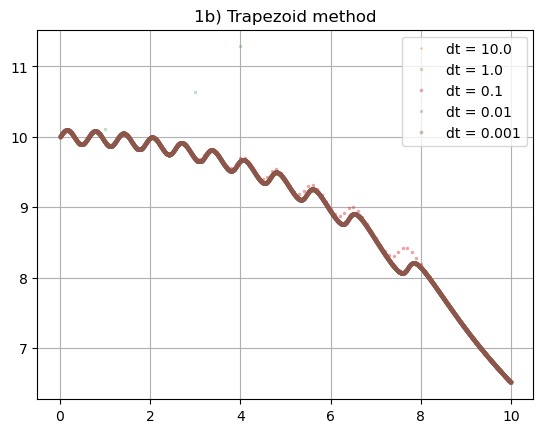

In [32]:
for t, style in zip(tlist, stylelist):
    trapezoid = trapezoid_method3(f, t, t0, tf, y0, df)
    time = trapezoid[0]
    numeric = trapezoid[1]
    plt.plot(time, numeric, style, label=f"dt = {t}", markersize=2, alpha=0.3)

plt.legend()
plt.grid()
plt.title("1b) Trapezoid method")
plt.savefig("1b) trapezoid method.png")
plt.show()

In [18]:
approx_f = lambda y, h : -(np.sin(y) + 1)/np.cos(y) + np.exp(h)*(np.sin(10) + 1)/np.cos(10)
approx_df = lambda y,h : -(np.sin(y) + 1)/(np.cos(y)**2)

In [19]:
sollist = []
for i,t in enumerate(tlist):
    # print(i)
    sollist.append(newton(approx_f, approx_df, 10, 1.0e-8, 1000, h=t))

sollist = np.array(sollist)
sollist

array([9.04416459, 9.91387376, 9.99158652, 9.9991607 , 9.99991609])

In [20]:
solerror = np.zeros_like(sollist)
for i,t in enumerate(tlist):
    # print(i)|
    forward = trapezoid_method3(f, t, t0, tf, y0, df)

    # y = odeEuler(f,[0,h[n]],y0)
    y = forward[1][1]
    print(y)
    # y1_exact = exact(n, lamb)

    solerror[i] = np.abs(y - sollist[i])

print(solerror)
    


9.105701475422876
9.913909357831322
9.991586547987456
9.999160700319583
9.999916090564815
[6.15368824e-02 3.56024616e-05 2.93296161e-08 2.78532752e-11
 1.91321980e-09]


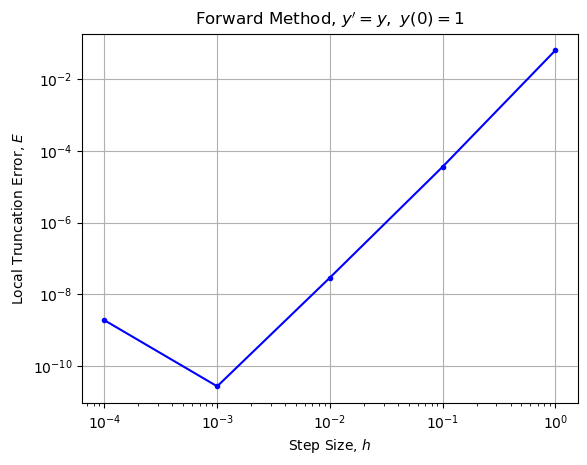

3.237655463600883
3.084173648279701
3.022430107198391
-1.8368885970343152


In [21]:
plt.loglog(tlist,solerror,'b.-'), plt.grid(True)
plt.title("Forward Method, $y'=y,~y(0)=1$")
plt.xlabel("Step Size, $h$"), plt.ylabel("Local Truncation Error, $E$")
plt.show()

for j in range(len(tlist)-1):
    print((np.log(solerror[j+1]) - np.log(solerror[j])) / (np.log(tlist[j+1]) - np.log(tlist[j])))

1c) For the differential equation
$$
\frac{dy}{dt} = \cos(ty), ~ y(0) = 10, ~ 0\leq t \leq 10,
$$
solve it using the Trapezoid method.  How does your solution compare in behavior to that you found in $2b$?  Explore several choices of step size $\delta t$ and determine the relative strengths and weaknesses of all three different approaches. In particular, which method allows for the largest time step $\delta t$ such that you get believable results?

In [22]:
f = lambda y,t: np.cos(t*y)
df = lambda y,t: -t*np.sin(t*y)
numerical_sol = {}

In [23]:
tlist = [1e1, 1e0, 1e-1, 1e-2, 1e-3]
stylelist = ['C1.', "C2x", "C3s", "C4*", "C5p"]
methodlist = ["Forward", "Backward", "Trapezoid"]

In [24]:
for t, style in zip(tlist, stylelist):
    trapezoid = trapezoid_method3(f, t, t0, tf, y0, df)
    time = trapezoid[0]
    numeric = trapezoid[1]
    numerical_sol[f"Trapezoid {t}"] = numeric
    numerical_sol[f"time {t}"] = time
    

In [25]:
for t, style in zip(tlist, stylelist):
    backward = backward_euler3(f, t0, tf, y0, t, df)
    time = backward[0]
    numeric = backward[1]
    numerical_sol[f"Backward {t}"] = numeric

In [26]:
for t, style in zip(tlist, stylelist):
    forward = forward_euler1(f, t, t0, tf, y0)
    time = forward[0]
    numeric = forward[1]
    numerical_sol[f"Forward {t}"] = numeric

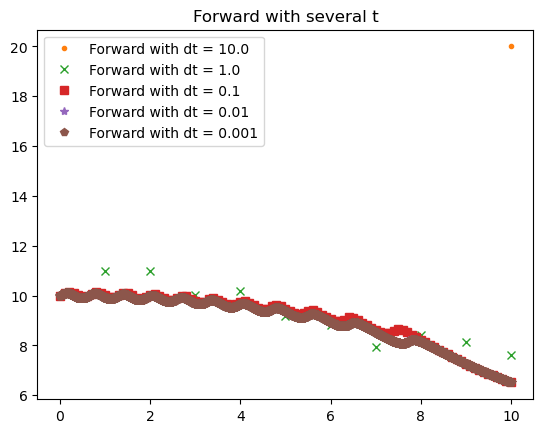

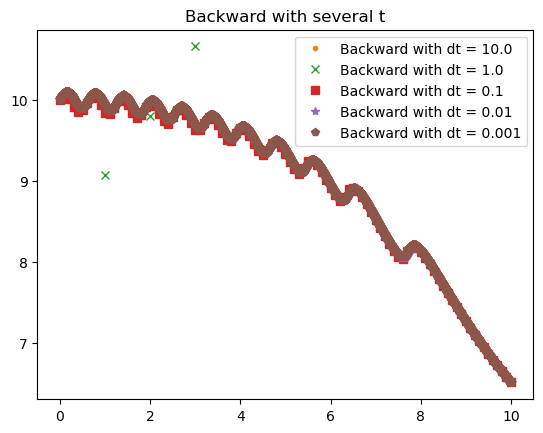

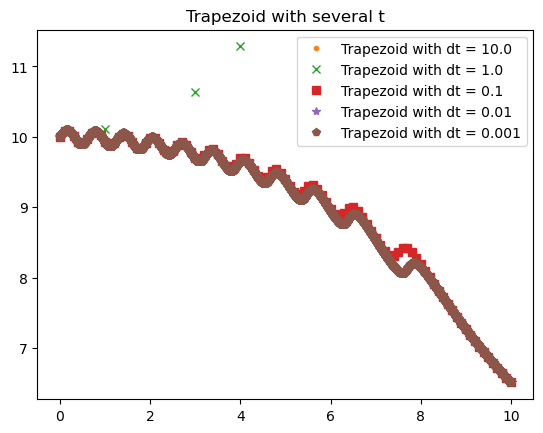

In [27]:
for method in methodlist:
    for t, style in zip(tlist, stylelist):
        plt.plot(numerical_sol[f"time {t}"],numerical_sol[f"{method} {t}"], style, label = f"{method} with dt = {t}")
    
    plt.title(f"{method} with several dt")
    plt.legend()
    plt.savefig(f"{method}.png")
    plt.show()



# Problem 2

In [28]:
def euler_solver(dydt, u0, t, args=()):
    """
    dydt:   callable (ndarray, float) -> ndarray
    u0:     ndarray (N,)
    t:      ndarray (M,)
    ---
    returns ndarray (M, N)
    """
    t = np.asarray(t)
    u0 = np.asarray(u0)
    # Prepare grid
    grid = np.zeros((len(t), len(u0)))
    grid[0] = u0
    # Solve with grid
    for i in range(1, len(t)):
        h = t[i] - t[i - 1]
        f = np.asarray(dydt(grid[i - 1], t[i], *args))
        grid[i] = grid[i - 1] + h * f
    return grid

In [33]:
def rk4_solver(dydt, u0, t, args=()):
    """
    dydt:   callable (ndarray, float) -> ndarray
    u0:     ndarray (N,)
    t:      ndarray (M,)
    ---
    returns ndarray (M, N)
    """
    t = np.asarray(t)
    u0 = np.asarray(u0)
    # Prepare grid
    grid = np.zeros((len(t), len(u0)))
    grid[0] = u0
    # Solve with grid
    for i in range(1, len(t)):
        h = t[i] - t[i - 1]
        f0 = grid[i - 1]
        f1 = np.asarray(dydt(f0, t[i], *args))
        f2 = np.asarray(dydt(f0 + 0.5*h*f1, t[i]+0.5*h, *args))
        f3 = np.asarray(dydt(f0 + 0.5*h*f2, t[i]+0.5*h, *args))
        f4 = np.asarray(dydt(f0 + h*f3, t[i]+h, *args))
        grid[i] = grid[i - 1] + (1/6) * h * (f1 + f4 + 2 * (f2 + f3))
    return grid

In [34]:
def van_der_pol(mu, u0, t, method='euler'):

    def func(u0, t, mu):
        x, y = u0
        dydt = [y, mu*(1-x**2)*y - x]
        return dydt

    if method == 'euler':
        solver = euler_solver
    elif method == 'rk4':
        solver = rk4_solver
    else:
        raise RuntimeError("Not valid solver name")

    # sol = odeint(func, u0, t)
    sol = solver(func, u0, t, args=(mu,))
    return sol

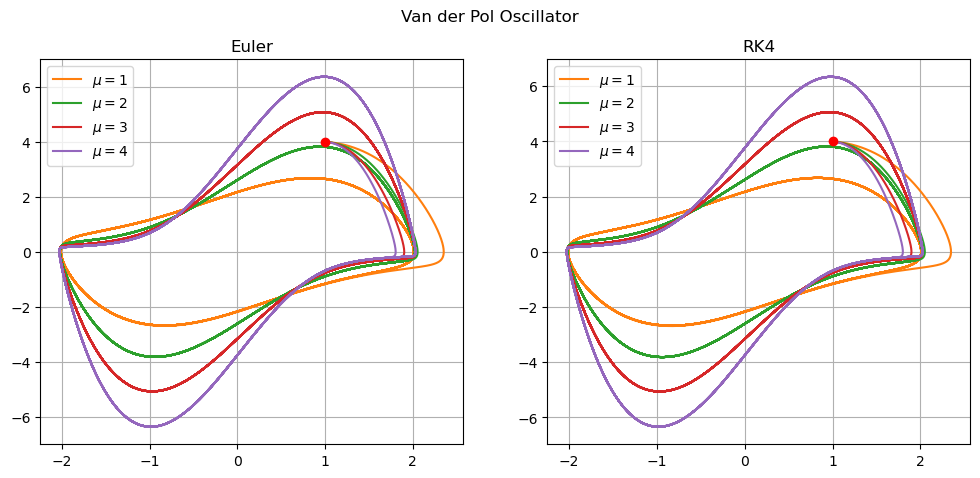

In [42]:
t = np.linspace(0, 100, 50000)
u0 = [1, 4] 
mus = [1, 2, 3, 4]
styles = ["C1", "C2", "C3", "C4"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
methods = ['Euler', 'RK4']

for mu, style in zip(mus, styles):
    for i, m in enumerate(methods):
        sol = van_der_pol(mu, u0, t, method=m.lower())
        axes[i].plot(sol[:, 0], sol[:, 1], c=style, label=f"$\mu = {mu}$")

for i, m in enumerate(methods):
    axes[i].set_title(m)
    axes[i].grid()
    axes[i].legend()
    axes[i].plot(u0[0], u0[1], 'ro')
fig.suptitle("Van der Pol Oscillator")
plt.savefig("Van der Pol Oscillator.png")
plt.show(fig)

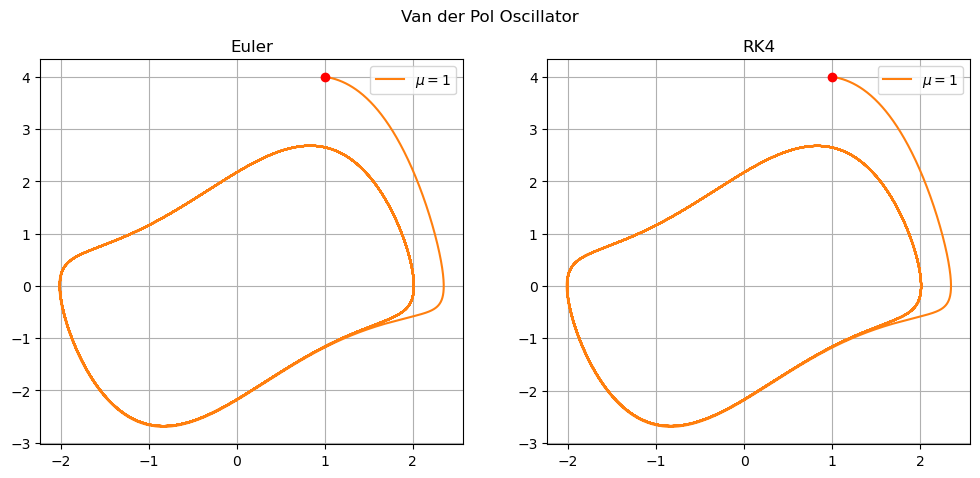

In [43]:
t = np.linspace(0, 100, 50000)
u0 = [1, 4] 
mus = [1]
styles = ["C1", "C2", "C3", "C4"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
methods = ['Euler', 'RK4']

for mu, style in zip(mus, styles):
    for i, m in enumerate(methods):
        sol = van_der_pol(mu, u0, t, method=m.lower())
        axes[i].plot(sol[:, 0], sol[:, 1], c=style, label=f"$\mu = {mu}$")

for i, m in enumerate(methods):
    axes[i].set_title(m)
    axes[i].grid()
    axes[i].legend()
    axes[i].plot(u0[0], u0[1], 'ro')
fig.suptitle("Van der Pol Oscillator")
plt.savefig("Van der Pol Oscillator mu=1.png")
plt.show(fig)